In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV
pd.set_option('display.max_columns', 0)

In [2]:
df = pd.read_csv('engineered_data.csv', index_col=0)

In [3]:
# Set features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
            'long', 'sqft_living15', 'sqft_lot15', 'yr_built_or_renovated',
            'years_old', 'age_feature', 'sqft_living_relative_to_nabe',
            'renovated', 'viewed', 'sq_ft_per_flr']

df_features = df[features]
target = df['price']

In [4]:
### Create Train and Test Split:

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(
    df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 25) Target:  (13832,)
Training set - Features:  (3458, 25) Target:  (3458,)


In [5]:
# fit a model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-55444045.44162651
[-2.80515532e+04  3.76934198e+04  2.21567075e+02  1.30637587e-01
 -2.12601998e+04  5.71401061e+05  5.31535078e+04  3.51463411e+04
  9.75941516e+04  1.27551997e+02  9.40150784e+01 -1.95936016e+03
  2.36876624e+03 -6.16669631e+02  6.15096368e+05 -2.25683992e+05
 -1.51872240e+02 -1.96469372e-01  3.10503355e+04  3.17804907e+04
  2.56362105e+01 -3.26357295e+05 -4.66789796e+06 -5.30862452e+03
 -1.72195852e+01]


In [6]:
# How well did our model perform?
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.7154951181735081


In [7]:
y_train_pred = lm.predict(X_train)

In [8]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 123754.64059509123
Mean Squared Error: 39394847703.69362
Root Mean Squared Error: 198481.35354156978


In [9]:
# Predicting the Test Set
y_pred = lm.predict(X_test)

In [10]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7033250691741091


In [11]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:126046.2288203114
Mean Squared Error:42400276678.12249
Root Mean Squared Error:205913.274652516


In [12]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  198481 vs. Testing:  205913


In [13]:
# Check the assumptions of linear regression

# Check to see if our errors are normally distributed
residuals = (y_test- y_pred)

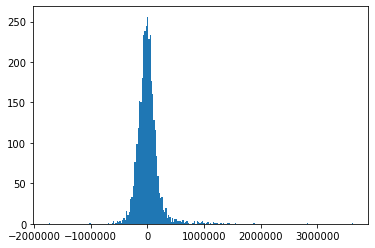

In [14]:
plt.hist(residuals, bins='auto')
plt.show()

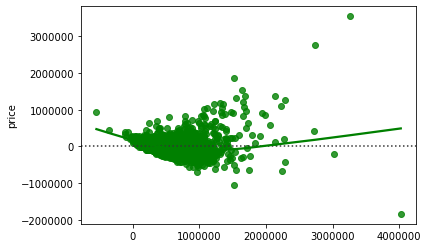

In [15]:
# Checkt to see if our errors are IID and homoscedastic.
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [16]:
# Use the log of the gross
target_log = np.log(target)

In [17]:
#instantiate a linear regression object
log_model = LinearRegression()

#fit the linear regression to the log of the target variable
log_model.fit(X_train, np.log(y_train))

#access output
print(log_model.intercept_)
print(log_model.coef_)

-105.35667284051515
[-1.15161220e-02  5.14728749e-02  2.48107992e-05  4.93331101e-07
  7.63063268e-02  4.29635415e-01  2.16732289e-02  7.37078541e-02
  1.55610160e-01 -1.68886559e-05  4.16994551e-05 -2.97056646e-03
  2.35782970e-03 -7.20975533e-04  1.41668244e+00 -1.84779139e-01
  1.96507855e-04 -2.92254631e-08  5.09077841e-02  5.15381102e-02
  6.05893023e-05  1.90828516e-01 -4.65898885e+00  1.11989268e-01
  7.64990106e-05]


In [18]:
y_log_train_pred = log_model.predict(X_train)

In [19]:
# Expoentiate predictions to rescale back to original scale
y_log_train_pred = np.exp(y_log_train_pred)

In [20]:
log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_pred)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_pred))

print('Mean Absolute Error:', log_train_mae )
print('Root Mean Squared Error:' , log_train_rmse)

Mean Absolute Error: 106478.32093950825
Root Mean Squared Error: 177828.07118061383


In [21]:
# Let's see how it performs on the test data
y_log_pred = log_model.predict(X_test)

In [22]:
y_log_pred = np.exp(y_log_pred)

In [23]:
test_log_mae = metrics.mean_absolute_error(y_test, y_log_pred)
test__log_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))

print('Mean Absolute Error:' + str(test_log_mae))
print('Root Mean Squared Error:' + str(test__log_rmse))

Mean Absolute Error:110712.9955173305
Root Mean Squared Error:207297.64539868053


In [24]:
# Let's see how it performs on the test data
print('Original: ', int(test_rmse), "vs. Logged: ", int(test__log_rmse))

Original:  205913 vs. Logged:  207297


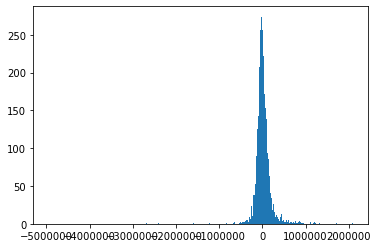

In [25]:
# Let's see how it performs on the test data
residuals = (y_test- y_log_pred)
plt.hist(residuals, bins='auto')
plt.show()

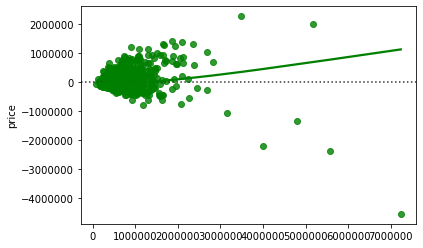

In [26]:
sns.residplot(y_log_pred, y_test, lowess=True, color="g")

In [27]:
## Evaluate Polynomial model

df_poly3 = pd.read_csv('engineered_data_poly3.csv')

### Train Test Split the polynomial data


#call train_test_split on the data and capture the results
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly3, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train_poly.shape, "Target: ", y_train_poly.shape)
print("Training set - Features: ", X_test_poly.shape, "Target: ",y_test_poly.shape)


### Fit the Model

#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)



### Predict on the training set

train_preds = lr_poly.predict(X_train_poly)

### Evaluate Training Data


train_mae_poly = metrics.mean_absolute_error(y_train_poly, train_preds)
train_mse_poly = metrics.mean_squared_error(y_train_poly, train_preds)
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))


print('Mean Absolute Error:', train_mae_poly )
print('Mean Squared Error:',  train_mse_poly)
print('Root Mean Squared Error:' , train_rmse_poly)

### Predict the test set

test_preds = lr_poly.predict(X_test_poly)

### Evaluate the test set

test_mae_poly = metrics.mean_absolute_error(y_test_poly, test_preds)
test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test_poly, test_preds))


print('Mean Absolute Error:' + str(test_mae_poly))
# print('Mean Squared Error:' + str(metrics.mean_squared_error(____, ____)))
print('Root Mean Squared Error:' + str(test_rmse_poly))

### Comparing our Model's performance on training data versus test data.



print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training set - Features:  (13832, 3276) Target:  (13832,)
Training set - Features:  (3458, 3276) Target:  (3458,)
Mean Absolute Error: 80903.15706244875
Mean Squared Error: 13347288820.537346
Root Mean Squared Error: 115530.46706621308
Mean Absolute Error:166844.38527547286
Root Mean Squared Error:2235538.664086344
Training:  198481 vs. Testing:  205913


In [54]:
y_test_pred = lm_log.predict(X_test)


#our model predcicted the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

NameError: name 'lm_log' is not defined

### Removing Variables based on correlation coefficient

When using this process to find features to remove, I think it is easier/better to do before creating our polynomials or interactions. So I'm going to look at the original 8 features, and search for high correlation in those. 

In [28]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)


In [29]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_or_renovated,years_old,age_feature,sqft_living_relative_to_nabe,renovated,viewed,sq_ft_per_flr
bedrooms,NaN,0.525995,0.586839,0.030560,0.179315,0.007167,0.078216,0.016175,0.363436,0.487800,0.306275,0.164581,0.012288,0.146273,0.007597,0.120493,0.398813,0.019807,0.171054,0.171177,0.066370,0.432054,0.011956,0.079132,0.391307
bathrooms,NaN,NaN,0.754353,0.078504,0.492800,0.072574,0.188267,0.123807,0.664316,0.684122,0.288169,0.507678,0.051492,0.193006,0.021930,0.215522,0.565778,0.074053,0.537704,0.538127,0.395825,0.454603,0.050965,0.175449,0.369163
sqft_living,NaN,NaN,NaN,0.168833,0.351500,0.121827,0.285025,0.062317,0.760049,0.874431,0.442037,0.316571,0.052999,0.187331,0.051552,0.228677,0.751843,0.170894,0.339497,0.340035,0.239972,0.569383,0.052723,0.267094,0.655712
sqft_lot,NaN,NaN,NaN,NaN,0.004269,0.016966,0.077697,0.010798,0.116790,0.181008,0.012922,0.054997,0.005931,0.126555,0.088823,0.219890,0.148123,0.730340,0.053782,0.053873,0.037349,0.068481,0.006025,0.068412,0.206438
floors,NaN,NaN,NaN,NaN,NaN,0.026498,0.025216,0.257399,0.456882,0.526344,0.249500,0.481202,0.008334,0.058942,0.045221,0.124712,0.277224,0.010396,0.496894,0.497283,0.606556,0.200132,0.008279,0.012966,0.251102
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,0.418471,0.006766,0.096860,0.083276,0.096845,0.020006,0.094712,0.033314,0.006153,0.039215,0.098347,0.024004,0.007196,0.007287,0.007568,0.042287,0.095117,0.278525,0.067371
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040953,0.251795,0.164209,0.283196,0.046915,0.092113,0.090405,0.008581,0.073212,0.283037,0.069932,0.017950,0.017954,0.025120,0.074540,0.092229,0.924612,0.177790
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145388,0.157424,0.162766,0.363959,0.060430,0.005186,0.013361,0.109302,0.093753,0.011136,0.397751,0.396936,0.309929,0.025191,0.059953,0.042391,0.049436
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755676,0.167599,0.448011,0.011643,0.179040,0.116612,0.191478,0.713230,0.114429,0.459761,0.460367,0.319937,0.277994,0.011241,0.235117,0.473701
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048646,0.420815,0.025760,0.255650,0.002408,0.334193,0.728536,0.186486,0.433176,0.433680,0.345789,0.418826,0.025629,0.146787,0.630178


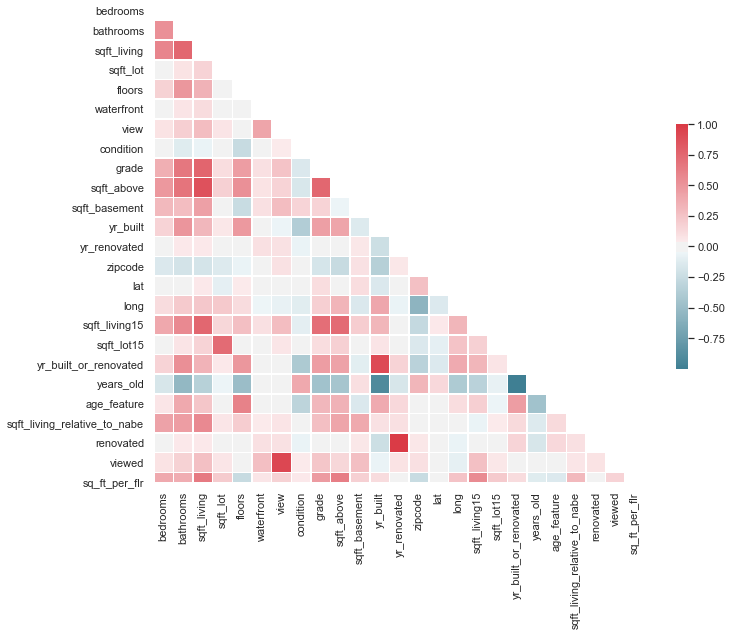

In [30]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=True)
X_test_8.drop(columns=to_drop, inplace=True)

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
to_drop

['yr_built_or_renovated', 'years_old', 'renovated', 'viewed']

## Variance Inflation Factor (VIF) 

VIFis a measure of colinearity among predictor variables within a multiple regression. The variance inflation factor for the estimated regression coefficient $b_j$ — denoted $VIF_j$ —is just the factor by which the variance of $b_j$ is "inflated" by the existence of correlation among the predictor variables in the model.In particular, the variance inflation factor for the jth predictor is:

$$VIF_j=\frac{1}{1-R_{j}^{2}}$$


where $R^2_j$  is the $R^2$-value obtained by regressing the jth predictor on the remaining predictors. 


Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://online.stat.psu.edu/stat462/node/180/

In [33]:
[variance_inflation_factor(X_train.values, i) for i in range(X_train_8.shape[1])]

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[25.62592578231073,
 29.186147077287323,
 inf,
 2.2898116402708104,
 72.58619488713238,
 1.3341579726408423,
 9.478691508252124,
 36.06517344843621,
 151.4182703613523,
 inf,
 inf,
 202070.1217465565,
 21133.05069555705,
 4852344.897261434,
 140893.16767977146,
 1371533.0720313895,
 134.42523570245345,
 2.59184515306954,
 3640794.5636650412,
 2262.240513436478,
 4.128239469838804]

In [34]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,25.8,bedrooms
1,29.4,bathrooms
2,inf,sqft_living
3,2.3,sqft_lot
4,72.4,floors
5,1.4,waterfront
6,9.6,view
7,36.1,condition
8,151.5,grade
9,inf,sqft_above


In [35]:
df_features.corrwith(target).abs()


bedrooms                        0.313775
bathrooms                       0.524335
sqft_living                     0.703540
sqft_lot                        0.086803
floors                          0.256985
waterfront                      0.275779
view                            0.395485
condition                       0.036099
grade                           0.666215
sqft_above                      0.607760
sqft_basement                   0.323312
yr_built                        0.056450
yr_renovated                    0.117770
zipcode                         0.048958
lat                             0.302394
long                            0.019327
sqft_living15                   0.585567
sqft_lot15                      0.081423
yr_built_or_renovated           0.104812
years_old                       0.104828
age_feature                     0.193259
sqft_living_relative_to_nabe    0.298696
renovated                       0.117409
viewed                          0.354487
sq_ft_per_flr   

## Select the Best features based on some statistical measure

Scikit-learn provides the Select K best features using F-Test.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.



***I am using the F-test to select the 20 top varaibles for this model***

In [36]:
X_train.shape

(13832, 25)

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x1a205f2598>)

In [38]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [39]:
list(removed_columns)

['condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15']

In [40]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'sqft_living15',
 'yr_built_or_renovated',
 'years_old',
 'age_feature',
 'sqft_living_relative_to_nabe',
 'renovated',
 'viewed',
 'sq_ft_per_flr']

Now let's use those 20 columns to fit a model and see how it performs. 

In [41]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)




Training Root Mean Squared Error: 202093.11183591443
Testing Root Mean Squared Error: 208321.83011089117


In [42]:
list(zip(selected_columns, lm_kbest.coef_))

[('bedrooms', -25807.432412330512),
 ('bathrooms', 44404.13000464466),
 ('sqft_living', 217.99401612098566),
 ('sqft_lot', -0.03454551611509254),
 ('floors', -6051.807829872177),
 ('waterfront', 575643.0117001854),
 ('view', 50919.14258937778),
 ('grade', 103462.40561527721),
 ('sqft_above', 114.07975536006263),
 ('sqft_basement', 103.91425725681205),
 ('yr_renovated', 3688.0037370807913),
 ('lat', 560272.3366306205),
 ('sqft_living15', -157.7938530878468),
 ('yr_built_or_renovated', 25398.530411543506),
 ('years_old', 28518.962879468287),
 ('age_feature', 19.569387527804313),
 ('sqft_living_relative_to_nabe', -330885.6063265757),
 ('renovated', -7183548.51739198),
 ('viewed', -6507.495339436149),
 ('sq_ft_per_flr', 3.2855890002199186)]

In [43]:
# Predicting the Test Set
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  205913.274652516 
 KBest:    208321.83011089117 



In [ ]:
# Wrapper Methods: Recursive Feature Elimination

In [44]:
ols = linear_model.LinearRegression()

In [45]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [46]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [47]:
list(removed_rfe)

['sqft_lot', 'sqft_lot15', 'sq_ft_per_flr']

In [48]:
len(list(selected_rfe))

22

Now let's use those selected features to fit a model.

In [49]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 198604.8999954591
Testing Root Mean Squared Error: 205965.08667427846


In [50]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  205913.274652516 
 KBest:    208321.83011089117 
 RFE:      205965.08667427846


In [ ]:
# Embedded Methods

In [51]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_or_renovated,years_old,age_feature,sqft_living_relative_to_nabe,renovated,viewed,sq_ft_per_flr
17156,5,2.50,2400,4496,2.0,0,0,3,7,2400,0,2004,0,98042,47.3692,-122.126,1880,4319,2004,11,2116,1.276596,0,0,1200.000000
6138,3,1.75,2190,6000,1.5,0,0,4,7,2190,0,1920,0,98002,47.3063,-122.223,1610,6000,1920,95,1444,1.360248,0,0,1460.000000
6736,3,1.50,1460,5040,1.0,0,0,3,7,1100,360,1971,0,98133,47.7112,-122.357,2330,7560,1971,43,196,0.626609,0,0,1100.000000
4449,4,1.75,1530,17664,1.5,0,0,3,7,1530,0,1968,0,98058,47.4549,-122.155,1530,11625,1968,46,121,1.000000,0,0,1020.000000
3305,2,1.00,950,4560,1.5,0,0,3,7,950,0,1925,0,98112,47.6288,-122.300,2040,4560,1925,89,1024,0.465686,0,0,633.333333


***Plot to compare the size of all of our coefficients form our final model created by RFE***

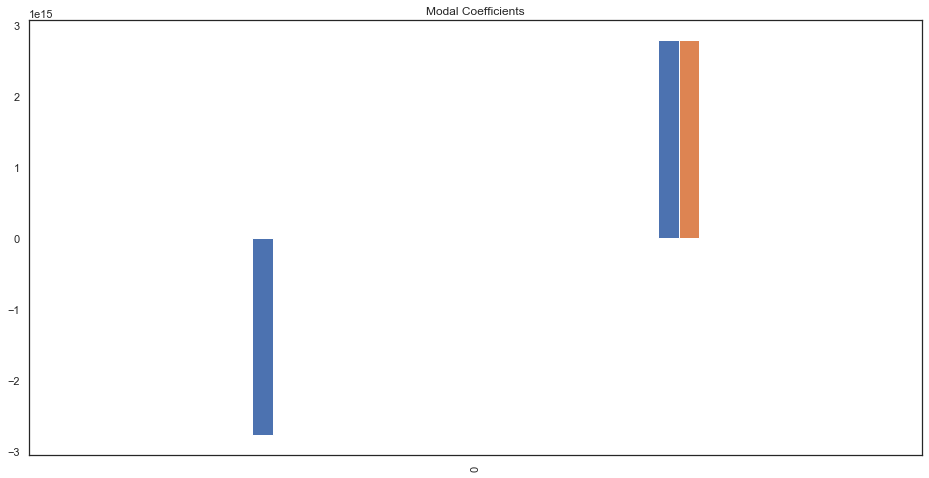

In [52]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [53]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273629652250132.34, tolerance: 191529062678.72354
  positive)


NameError: name 'y_test_pred' is not defined

In [ ]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

In [ ]:
coeff_df[coeff_df[0]==0]

In [ ]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

In [ ]:
# Final Model

In [ ]:
X_train.head()

***Plot to compare the size of all of our coefficients form our final model created by RFE***

In [ ]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

In [ ]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

In [ ]:
coeff_df[coeff_df[0]==0]

In [ ]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')